In [37]:
import numpy as np
import pandas as pd

In [38]:
n=6
A=np.zeros((n,n))
k=np.zeros(n)
edge_list=np.array([[1,2],[2,3],[3,4],[4,5],[5,1],[1,6],[2,6],[3,6],[4,6],[5,6]])
for i in range(len(edge_list)):
    A[edge_list[i][0]-1][edge_list[i][1]-1]=1
    A[edge_list[i][1]-1][edge_list[i][0]-1]=1
    k[edge_list[i][0]-1]+=1
    k[edge_list[i][1]-1]+=1
print(A)

[[0. 1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1.]
 [1. 0. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0.]]


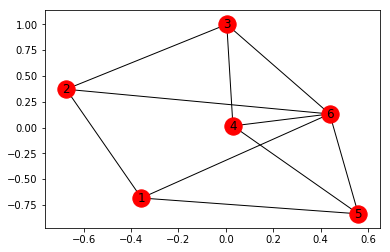

In [39]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_edges_from(edge_list)
nx.draw_networkx(G)

## SIRモデルを組む

In [40]:
# flag 0:S 1:I 2:R
flag=np.zeros(n)
# parameter beta:S -> I , gamma: I -> R
beta=0.25
gamma=0.1

In [41]:
S=np.array([5])
I=np.array([1])
R=np.array([0])
flag=np.zeros(n)
flag_old=np.zeros(n)
# influencer
influ=1
flag[int(influ-1)]=1
for t in range(15):
    flag_old=flag.copy()
    print(flag_old)
    for i in range(n):
        if(flag_old[i]==1):
            for j in range(n):
                if(i==j):
                    if(np.random.rand()<gamma):
                        flag[j]=2
                elif(A[i][j]==1 and flag_old[j]==0):
                    #print(t,i+1,j+1)
                    if (np.random.rand()<beta):
                        flag[j]=1
        else:
            pass
    count_s=0
    count_i=0
    count_r=0
    for i in range(n):
        if(flag[i]==0):
            count_s+=1
        elif(flag[i]==1):
            count_i+=1
            #print(i+1)
        else:
            count_r+=1
    print(count_s,count_i,count_r)
    S=np.append(S,count_s)
    I=np.append(I,count_i)
    R=np.append(R,count_r)

[1. 0. 0. 0. 0. 0.]
5 1 0
[1. 0. 0. 0. 0. 0.]
3 3 0
[1. 0. 0. 0. 1. 1.]
1 4 1
[1. 1. 0. 1. 2. 1.]
0 5 1
[1. 1. 1. 1. 2. 1.]
0 4 2
[1. 2. 1. 1. 2. 1.]
0 4 2
[1. 2. 1. 1. 2. 1.]
0 2 4
[2. 2. 1. 2. 2. 1.]
0 2 4
[2. 2. 1. 2. 2. 1.]
0 2 4
[2. 2. 1. 2. 2. 1.]
0 2 4
[2. 2. 1. 2. 2. 1.]
0 1 5
[2. 2. 2. 2. 2. 1.]
0 0 6
[2. 2. 2. 2. 2. 2.]
0 0 6
[2. 2. 2. 2. 2. 2.]
0 0 6
[2. 2. 2. 2. 2. 2.]
0 0 6


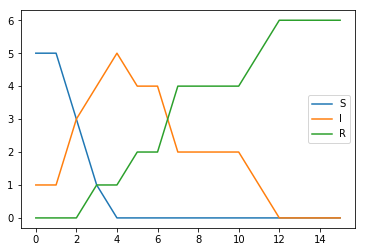

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(S,label="S")
plt.plot(I,label="I")
plt.plot(R,label="R")
plt.legend()

## 関数化して比較

In [43]:
def SIR(n,A,influ,beta,gamma):
    flag=np.zeros(n)
    for i in range(len(influ)):
        flag[influ[i]-1]=1
    S=np.array([n-len(influ)])
    I=np.array([len(influ)])
    R=np.array([0])
    
    for t in range(15):
        flag_old=flag.copy()
        #print(flag_old)
        for i in range(n):
            if(flag_old[i]==1):
                for j in range(n):
                    if(i==j):
                        if(np.random.rand()<gamma):
                            flag[j]=2
                    elif(A[i][j]==1 and flag_old[j]==0):
                        if (np.random.rand()<beta):
                            flag[j]=1
        count_s=0
        count_i=0
        count_r=0
        for i in range(n):
            if(flag[i]==0):
                count_s+=1
            elif(flag[i]==1):
                count_i+=1
            else:
                count_r+=1
        #print(count_s,count_i,count_r)
        S=np.append(S,count_s)
        I=np.append(I,count_i)
        R=np.append(R,count_r)
    plt.plot(S,label="S")
    plt.plot(R,label="R")
    plt.plot(I,label="I")
    plt.legend()

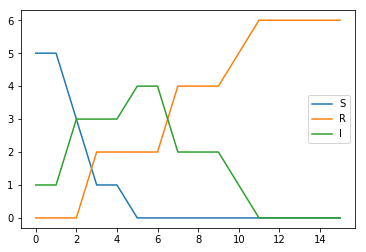

In [44]:
# parameter
beta=0.5
gamma=0.25

# influencer set node_id:1~6
influ=np.array([1])

SIR(n,A,influ,beta,gamma)


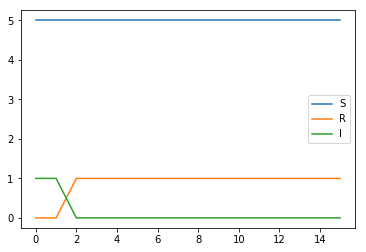

In [45]:
# parameter
beta=0.3
gamma=0.25

# influencer set node_id:1~6
influ=np.array([1])

SIR(n,A,influ,beta,gamma)

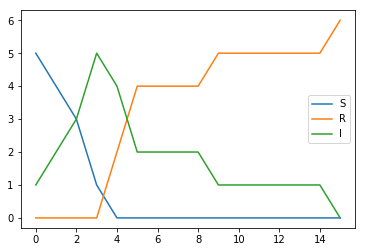

In [46]:
# parameter
beta=0.3
gamma=0.25

# influencer set node_id:1~6
influ=np.array([6])

SIR(n,A,influ,beta,gamma)

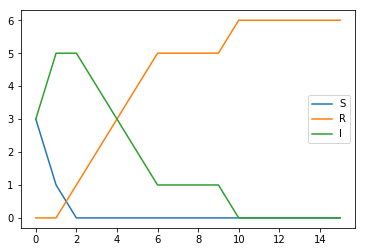

In [47]:
# parameter
beta=0.3
gamma=0.25

# influencer set node_id:1~6
influ=np.array([1,2,3])

SIR(n,A,influ,beta,gamma)

In [48]:
# check array 
A=np.array([1,2,3])
B=A
B[0]=100
print(A)
print(B)

A=np.array([1,2,3])
B=A.copy()
B[0]=100
print(A)
print(B)

[100   2   3]
[100   2   3]
[1 2 3]
[100   2   3]
